In [4]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy, pandas, datetime and plotlib packages
import numpy as np
import pandas as pd
from datetime import date as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Reading the CSV

uber = pd.read_csv("Uber Request Data.csv")

print(uber.columns)
print(uber.info())

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 210.8+ KB
None


In [6]:
#Checking the data
print(len(uber['Request id'].unique()))
print(uber['Status'].unique())
print(uber['Pickup point'].unique())
uber.head()

6745
['Trip Completed' 'Cancelled' 'No Cars Available']
['Airport' 'City']


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Manipulating the data:

-  <font color = blue> It can be observed from the data that the both the timestamp columns (Request and Drop) are not in proper/consistent format. Therefore we will first convert them to a common format. </font>
-  <font color = blue> Identifying Derived variables and extracting them :  </font>
-  <font color = red>Getting the Hour from the Request TimeStamp. </font>
-  <font color = red>Calculating the Travel time for the Trips Completed. </font>
-  <font color = red>Identifying the time of the day based on request hour. </font>
-  <font color = blue>The 24 hour distribution is done as below:</font>
- Mid-night : 00 – 04 hrs
- Early-morning : 04 – 07 hrs
- Morning : 07 – 12 hrs
- Afternoon : 12 – 16 hrs
- Evening : 16 – 20 hrs
- Night : 20 – 00 hrs

In [7]:
# Formatting the datetime columns
uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'],infer_datetime_format=True, dayfirst=True)
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'],infer_datetime_format=True,dayfirst=True)

#Extracting the requested hour
uber['Request Hour']=uber['Request timestamp'].dt.hour

# Calculating the travel time of the trip
uber['Travel Time']=uber['Drop timestamp']-uber['Request timestamp']

# Distributing the hours in the time slots.
uber['Time slot']= pd.cut(uber['Request Hour'], bins=[-1, 3, 6, 11, 15, 19, 23],
                     labels=["mid-night", "early-morning", "morning", "afternoon","evening","night"])
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Travel Time,Time slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,01:09:00,morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,00:50:00,evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,00:41:00,morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,00:55:00,night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,00:52:31,morning


#### Checking the column types of the derived metrics.

In [8]:
print(uber.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Request Hour         6745 non-null int64
Travel Time          2831 non-null timedelta64[ns]
Time slot            6745 non-null category
dtypes: category(1), datetime64[ns](2), float64(1), int64(2), object(2), timedelta64[ns](1)
memory usage: 375.6+ KB
None


### Analysing the stats of each of the three status to know the percentage of success and failed trips.

In [9]:
#grouping data on Status to count the trips for each status.
status_stats=uber.groupby('Status')['Status'].count().to_frame() 
status_stats.columns=['Stats']
status_stats

,Stats
Status,
Cancelled,1264
No Cars Available,2650
Trip Completed,2831


### Visually plotting the data to see the part of data for each status.
#### Pie-chart is preferred here as it is easy to determine the fraction of each category by just looking at the area of the divisions.

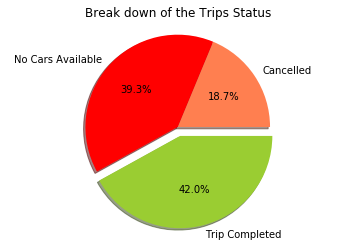

In [12]:
#using matplot lib to plot the pie chart
plt.title('Break down of the Trips Status')
plt.pie(status_stats, labels=status_stats.index, explode = (0, 0, 0.1), autopct='%1.1f%%', shadow=True, colors = ['coral', 'red','yellowgreen'] )
plt.axis('equal')
plt.show()

#### Drilling down the data to see the severity of each status against the pick-up point (Airport or City) and vice versa.

-  <font color = blue> The first bar chart shows the most impacted route for each Status. For instance, it is very evident that the problem of cancellation is more at the City-to-Airport Route whereas the non-availaibility of cars is more at Airport. 

-  <font color = blue> The Second bar chart compares the issues face at the pick-up points. For instance, at Airport the major issue faced is of non-availibity of the cars unlike in the city where Drivers cancels the requests for Airport drop. </font>


<function matplotlib.pyplot.show(*args, **kw)>

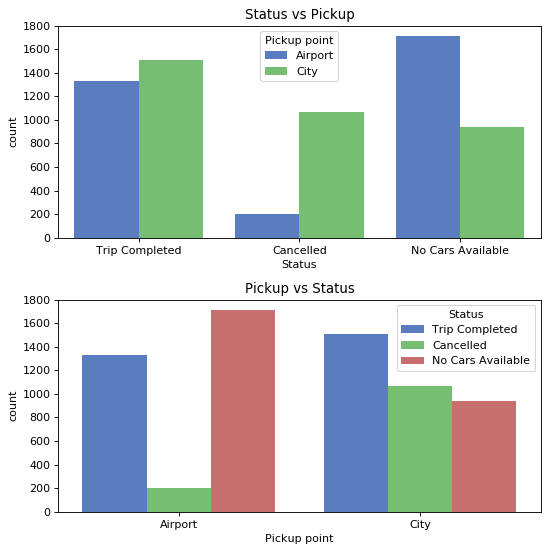

In [13]:
plt.figure(num=None, figsize=(7, 7), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2,1,1)
plt.title('Status vs Pickup')
sns.countplot(x='Status', hue='Pickup point', data=uber, palette="muted")

plt.subplot(212)
plt.title('Pickup vs Status')
sns.countplot(x='Pickup point', hue='Status', data=uber, palette="muted")

plt.tight_layout()
plt.show

#### To understand better, we will further drill down to see at what time of the day do the customer face the problem of cars shortage and cancellation.

In [14]:
#Creating two separate dataframes for Airport-to-City and City-to-Airport Rides.
Airport_pickup=uber.loc[(uber["Pickup point"]=='Airport'),['Pickup point','Status','Time slot']]
City_pickup=uber.loc[(uber["Pickup point"]=='City'),['Pickup point','Status','Time slot']]

<function matplotlib.pyplot.show(*args, **kw)>

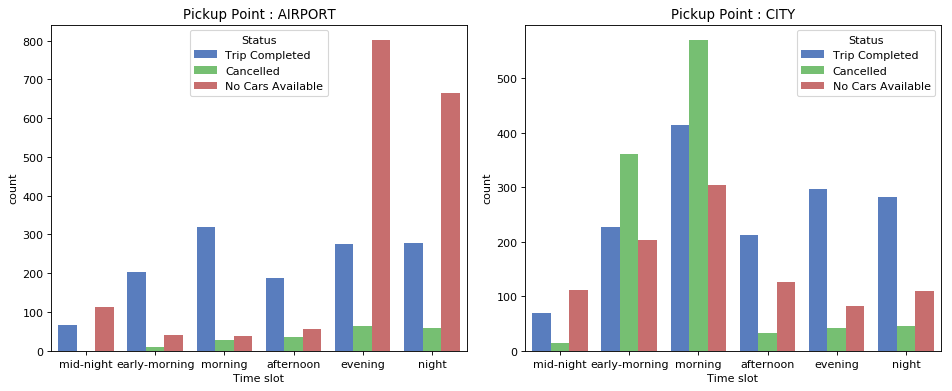

In [15]:
plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1,2,1)
plt.title('Pickup Point : AIRPORT')
sns.countplot(x='Time slot', hue='Status', data=Airport_pickup, palette="muted")


plt.subplot(1,2,2)
plt.title('Pickup Point : CITY')
sns.countplot(x='Time slot', hue='Status', data=City_pickup, palette="muted")

plt.tight_layout()
plt.show

#### We can also see the same distibution and comparison for each hour.

The above graph can also be segmented to the hour level.

Note: For better readability I've just plotted the 'Cancelled' and 'No Cars Available' in the point plot.

In [16]:
# creating DFs for point-plot
Airport_Pickup_stats= uber.loc[((uber['Pickup point']=='Airport') & (uber["Status"]!='Trip Completed')),['Request Hour','Status']].groupby(['Request Hour','Status'])['Status'].count().to_frame()
Airport_Pickup_stats.columns=['Stats']
Airport_Pickup_stats.head()

,,Stats
Request Hour,Status,
0,No Cars Available,30
1,No Cars Available,29
2,No Cars Available,25
3,No Cars Available,30
4,Cancelled,2


In [17]:
City_Pickup_stats= uber.loc[((uber['Pickup point']=='City') & (uber["Status"]!='Trip Completed')),['Request Hour','Status']].groupby(['Request Hour','Status'])['Status'].count().to_frame()
City_Pickup_stats.columns=['Stats']
City_Pickup_stats.head()

Stats
Request Hour Status                  
0            Cancelled              3
             No Cars Available     26
1            Cancelled              4
             No Cars Available     27
2            Cancelled              5

<function matplotlib.pyplot.show(*args, **kw)>

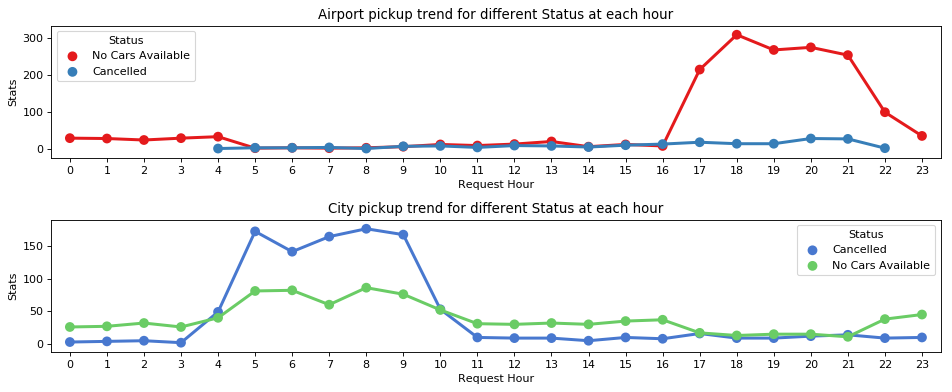

In [18]:
plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(211)
plt.title('Airport pickup trend for different Status at each hour')
sns.pointplot(x=Airport_Pickup_stats.index.get_level_values(0), y=Airport_Pickup_stats.Stats, hue=Airport_Pickup_stats.index.get_level_values(1),palette="Set1")

plt.subplot(212)
plt.title('City pickup trend for different Status at each hour')
sns.pointplot(x=City_Pickup_stats.index.get_level_values(0), y=City_Pickup_stats.Stats, hue=City_Pickup_stats.index.get_level_values(1), palette="muted")

plt.tight_layout()
plt.show

### Calcuating the Supply-Demand Gap for Uber

#### Demand : Total Requests received.
#### Supply : Total Trips Completed.

In [19]:
# Generating a DF for Supply-Demand
Supply_Demand= uber.groupby("Time slot")['Request timestamp','Drop timestamp'].count()
Supply_Demand.columns=['Demand','Supply']

#Changing the index as column.
Supply_Demand=Supply_Demand.reset_index()

# Changing the type of resetted-index from category to object
# This allows us to plot the column on the plot
Supply_Demand['Time slot']=Supply_Demand['Time slot'].astype('object')

#Inspecting the data frame
print(Supply_Demand.columns)
Supply_Demand 

Index(['Time slot', 'Demand', 'Supply'], dtype='object')


,Time slot,Demand,Supply
0,mid-night,375,136
1,early-morning,1046,430
2,morning,1674,733
3,afternoon,651,400
4,evening,1560,572
5,night,1439,560


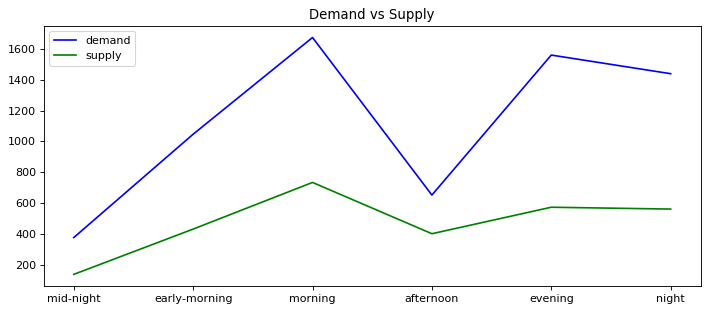

In [20]:
#Plotting the Dataframe
plt.figure(num=None, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')

#Plotting as a line-chart as the distance between lines clearly shows the gap between two values.
plt.title('Demand vs Supply')
plt.plot(Supply_Demand['Time slot'],Supply_Demand['Demand'] , color='b', label='demand')
plt.plot(Supply_Demand['Time slot'],Supply_Demand['Supply'] , color='g', label='supply')

plt.tight_layout()
plt.legend()
plt.show()

### Calculating the Supply_Demand for each pick-up point / route and storing in separate DF

In [21]:
# Calculating the Supply_Demand for City-to-Airport Route
Supply_Demand_City= uber.loc[(uber["Pickup point"]=='City'),:].groupby("Time slot")['Request timestamp','Drop timestamp'].count()
Supply_Demand_City.columns=['Demand','Supply']

# changing the index to column
Supply_Demand_City=Supply_Demand_City.reset_index()

#changing the type of "Time-slot" from category to ibject for graph plotting
Supply_Demand_City['Time slot']=Supply_Demand_City['Time slot'].astype('object')

print(Supply_Demand_City.columns)
Supply_Demand_City

Index(['Time slot', 'Demand', 'Supply'], dtype='object')


,Time slot,Demand,Supply
0,mid-night,194,69
1,early-morning,793,228
2,morning,1290,415
3,afternoon,373,213
4,evening,420,296
5,night,437,283


In [22]:
# Calculating the Supply_Demand for Airport-to-City Route
Supply_Demand_Airport= uber.loc[(uber["Pickup point"]=='Airport'),:].groupby("Time slot")['Request timestamp','Drop timestamp'].count()
Supply_Demand_Airport.columns=['Demand','Supply']

# changing the index to column
Supply_Demand_Airport=Supply_Demand_Airport.reset_index()

#changing the type of "Time-slot" from category to ibject for graph plotting
Supply_Demand_Airport['Time slot']=Supply_Demand_Airport['Time slot'].astype('object')

print(Supply_Demand_Airport.columns)
Supply_Demand_Airport

Index(['Time slot', 'Demand', 'Supply'], dtype='object')


,Time slot,Demand,Supply
0,mid-night,181,67
1,early-morning,253,202
2,morning,384,318
3,afternoon,278,187
4,evening,1140,276
5,night,1002,277


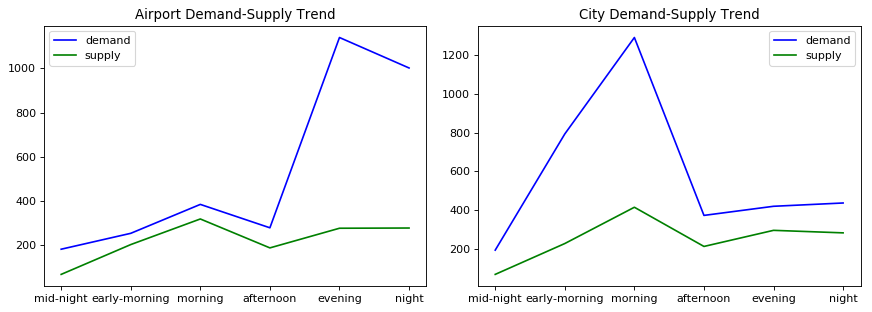

In [23]:
plt.figure(num=None, figsize=(11, 4), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121)
plt.title('Airport Demand-Supply Trend')
plt.plot(Supply_Demand_Airport['Time slot'],Supply_Demand_Airport['Demand'] , color='b', label='demand')
plt.plot(Supply_Demand_Airport['Time slot'],Supply_Demand_Airport['Supply'] , color='g', label='supply')
plt.legend()

plt.subplot(122)
plt.title('City Demand-Supply Trend')
plt.plot(Supply_Demand_City['Time slot'],Supply_Demand_City['Demand'] , color='b', label='demand')
plt.plot(Supply_Demand_City['Time slot'],Supply_Demand_City['Supply'] , color='g', label='supply')
plt.legend()

plt.tight_layout()
plt.show()

### Calculating the difference between Demand and Supply for each pick up point.

In [24]:
Supply_Demand_City['Gap']=Supply_Demand_City['Demand']-Supply_Demand_City['Supply']
Supply_Demand_Airport['Gap']=Supply_Demand_Airport['Demand']-Supply_Demand_Airport['Supply']
Supply_Demand_City

,Time slot,Demand,Supply,Gap
0,mid-night,194,69,125
1,early-morning,793,228,565
2,morning,1290,415,875
3,afternoon,373,213,160
4,evening,420,296,124
5,night,437,283,154


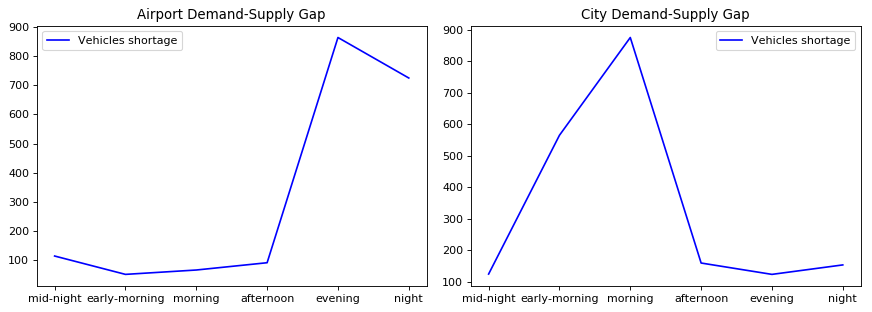

In [25]:
plt.figure(num=None, figsize=(11, 4), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(121)
plt.title('Airport Demand-Supply Gap')
plt.plot(Supply_Demand_Airport['Time slot'],Supply_Demand_Airport['Gap'] , color='b', label='Vehicles shortage')
plt.legend()

plt.subplot(122)
plt.title('City Demand-Supply Gap')
plt.plot(Supply_Demand_City['Time slot'],Supply_Demand_City['Gap'] , color='b', label='Vehicles shortage')
plt.legend()

plt.tight_layout()
plt.show()

### The following observations can be made from the above figures:

- For Airpot-to-City rides, the maximum gap exists during the evening until night i.e. a person is least likely to get a cab at this time.
- For City-to-Airport rides, the maximum gap exists during the Morning i.e. a person is least likely to get a cab to Airport at this time.